In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from scipy.stats import gaussian_kde
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
# Convert the text data into sequences of integers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import pandas as pd

true_df = pd.read_csv('/content/drive/MyDrive/canis/archive.zip (Unzipped Files)/DataSet_Misinfo_TRUE.csv')
fake_df = pd.read_csv('/content/drive/MyDrive/canis/archive.zip (Unzipped Files)/DataSet_Misinfo_FAKE.csv')
extra = pd.read_csv('/content/drive/MyDrive/canis/archive.zip (Unzipped Files)/EXTRA_RussianPropagandaSubset.csv')

# Info

In [ ]:
true_df.info()
print("\n-------------------------------------\n")
fake_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34975 entries, 0 to 34974
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  34975 non-null  int64 
 1   text        34946 non-null  object
dtypes: int64(1), object(1)
memory usage: 546.6+ KB

-------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43642 entries, 0 to 43641
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  43642 non-null  int64 
 1   text        43642 non-null  object
dtypes: int64(1), object(1)
memory usage: 682.0+ KB


In [ ]:
true_df.head()

,Unnamed: 0,text
0,0,The head of a conservative Republican faction ...
1,1,Transgender people will be allowed for the fir...
2,2,The special counsel investigation of links bet...
3,3,Trump campaign adviser George Papadopoulos tol...
4,4,President Donald Trump called on the U.S. Post...


In [ ]:
fake_df.describe()

,Unnamed: 0
count,43642.000000
mean,22293.806173
std,12889.800176
min,0.000000
25%,10910.250000
50%,22450.500000
75%,33472.750000
max,44426.000000


# Ilustrations

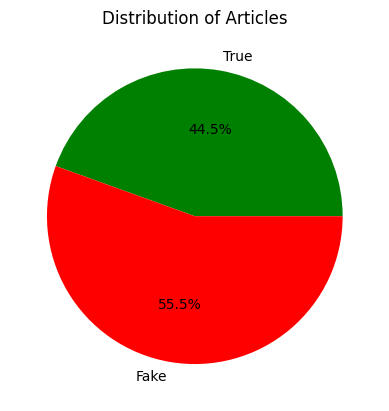

In [ ]:

labels = ['True', 'Fake']
sizes = [len(true_df), len(fake_df)]
colors = ['green', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Articles')
plt.show()


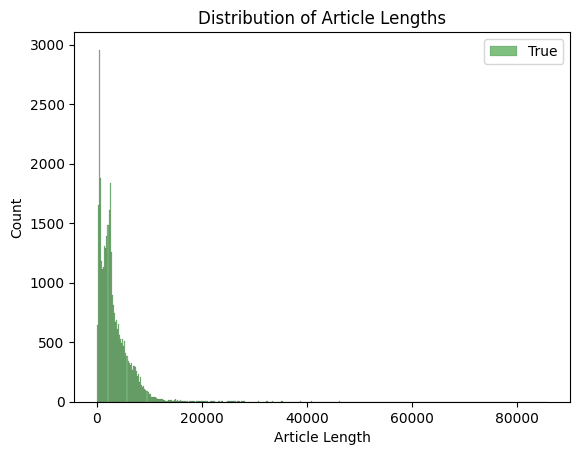

In [ ]:

get_length = lambda x: len(str(x))

sns.histplot(data=true_df['text'].apply(get_length), color='green', label='True', alpha=0.5)
#sns.histplot(data=fake_df['text'].apply(get_length), color='red', label='Fake', alpha=0.5)
plt.xlabel('Article Length')
plt.ylabel('Count')
plt.title('Distribution of Article Lengths')
plt.legend()
plt.show()


<Axes: xlabel='text', ylabel='Count'>

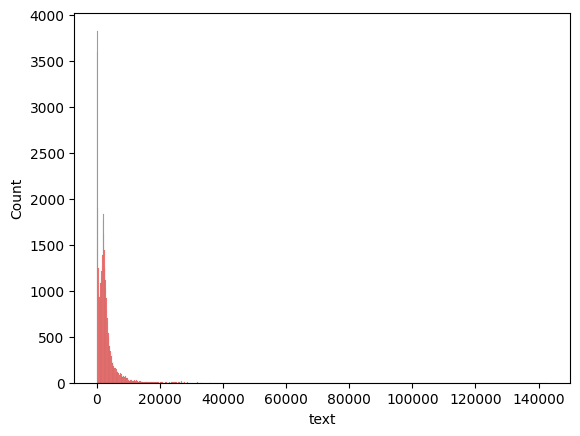

In [ ]:
sns.histplot(data=fake_df['text'].apply(get_length), color='red', label='Fake', alpha=0.5)

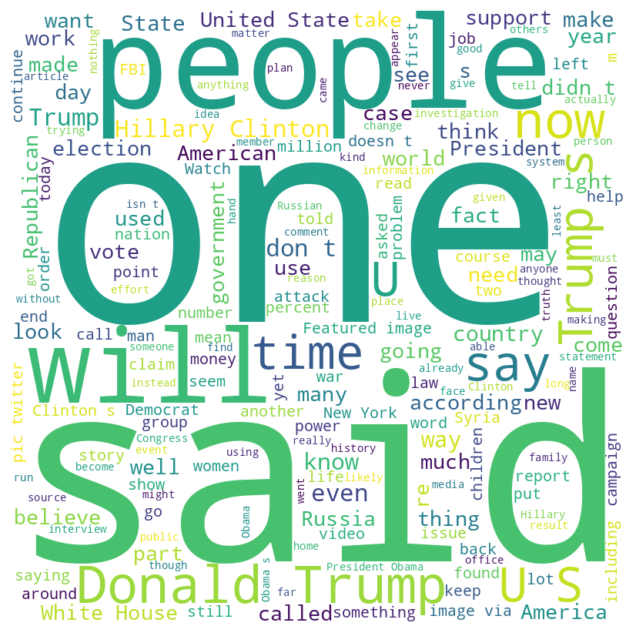

In [ ]:

# concatenate all text data into a single string
text = ' '.join(fake_df['text'].astype(str).tolist())

# generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# plot the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

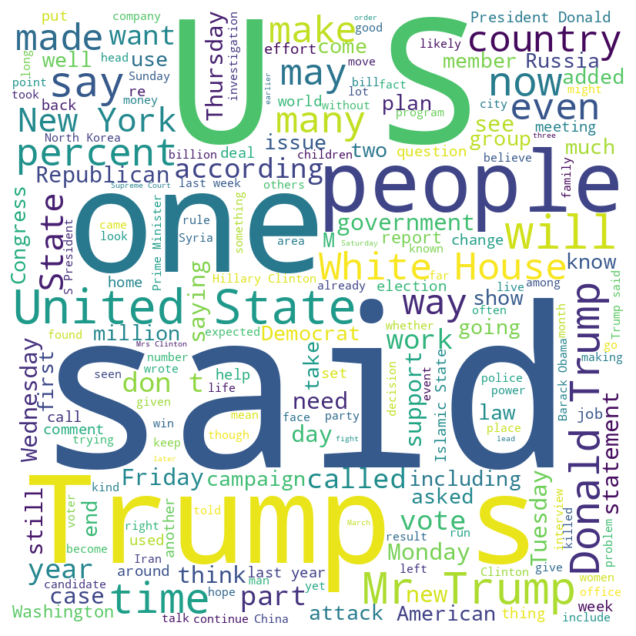

In [ ]:
# concatenate all text data into a single string
text = ' '.join(true_df['text'].astype(str).tolist())

# generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# plot the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
true_df['label']=1
df_true=true_df.drop('Unnamed: 0',axis=1)
df_true.head()

fake_df['label']=0
df_fake=fake_df.drop('Unnamed: 0',axis=1)
df_fake.head()

df=pd.concat([df_true,df_fake])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78617 entries, 0 to 43641
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    78588 non-null  object
 1   label   78617 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [ ]:
df=df.dropna(how="any")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78588 entries, 0 to 43641
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    78588 non-null  object
 1   label   78588 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


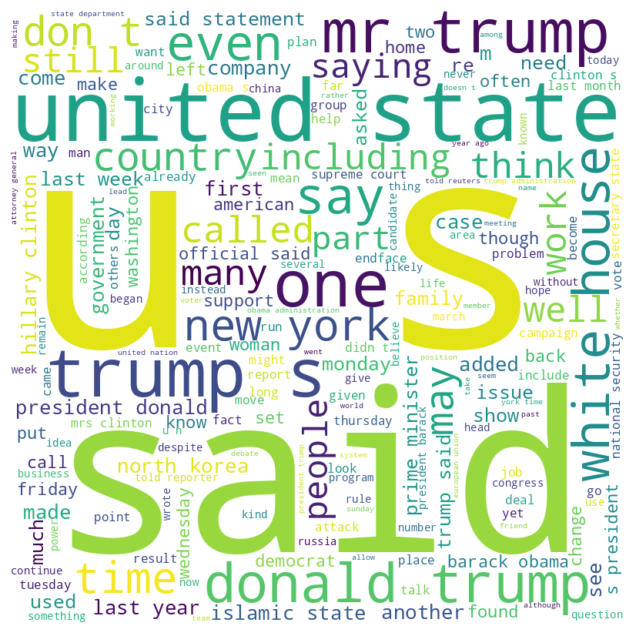

In [ ]:
text = ' '.join(true_df['text_processed'].astype(str).tolist())

# generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# plot the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

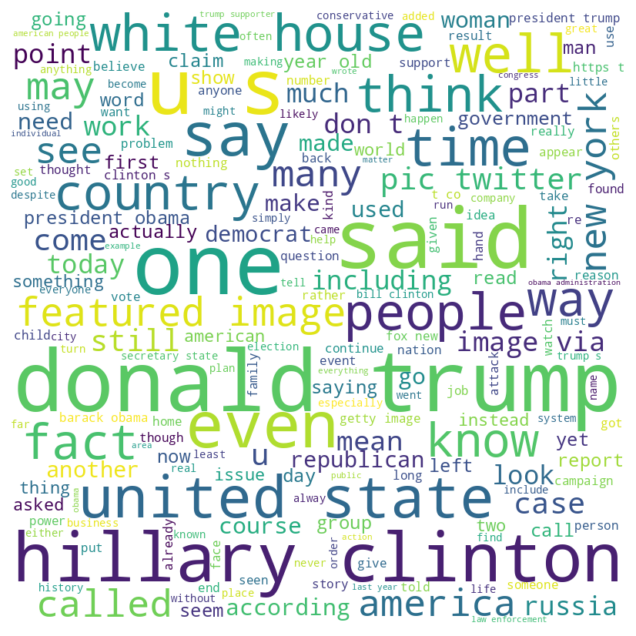

In [ ]:

text = ' '.join(fake_df['text_processed'].astype(str).tolist())

# generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# plot the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<ipython-input-3-9593fdcdfca1>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(true_sentiment, label='True news', shade=True)
<ipython-input-3-9593fdcdfca1>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fake_sentiment, label='Fake news', shade=True)


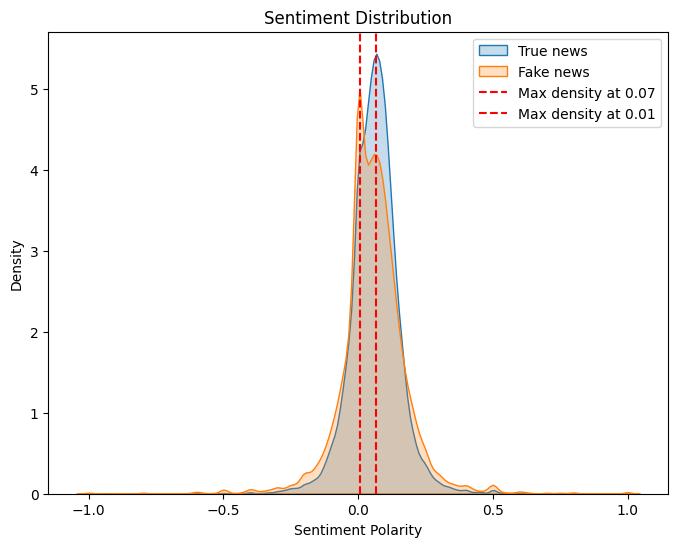

In [ ]:
# Calculate sentiment polarity for each news article
true_sentiment = true_df['text'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
fake_sentiment = fake_df['text'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

# Estimate kernel density for true_sentiment
density_true = gaussian_kde(true_sentiment)
density_fake = gaussian_kde(fake_sentiment)

# Evaluate kernel density at a range of sentiment polarity values
sentiment_range = np.linspace(-1, 1, num=1000)
density_values_true = density_true(sentiment_range)
density_values_fake = density_fake(sentiment_range)

# Find the sentiment polarity value with the maximum density
true_max_density = sentiment_range[density_values_true.argmax()]
fake_max_density = sentiment_range[density_values_fake.argmax()]

# Plot the sentiment distribution for each label
plt.figure(figsize=(8, 6))
sns.kdeplot(true_sentiment, label='True news', shade=True)
sns.kdeplot(fake_sentiment, label='Fake news', shade=True)
plt.axvline(true_max_density, color='red', linestyle='--', label=f'Max density at {true_max_density:.2f}')
plt.axvline(fake_max_density, color='red', linestyle='--', label=f'Max density at {fake_max_density:.2f}')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Write the sentiment values to a text file
true_sentiment.to_csv('true_sentiment_values.txt', index=False, header=None)
fake_sentiment.to_csv('fake_sentiment_values.txt', index=False, header=None)

#sentiment_range.to_csv('sentiment_range.txt', index=False, header=None)


In [ ]:

# Calculate the average number of words for each row in the true dataset
true_word_count = true_df['text_processed3'].astype(str).apply(lambda x: len(x.split()))
true_avg_word_count = np.mean(true_word_count)
print("True Dataset Average Word Count: ", true_avg_word_count)

# Calculate the average number of words for each row in the fake dataset
fake_word_count = fake_df['text_processed3'].astype(str).apply(lambda x: len(x.split()))
fake_avg_word_count = np.mean(fake_word_count)
print("Fake Dataset Average Word Count: ", fake_avg_word_count)


True Dataset Average Word Count:  333.2665904217298
Fake Dataset Average Word Count:  267.03799092617203


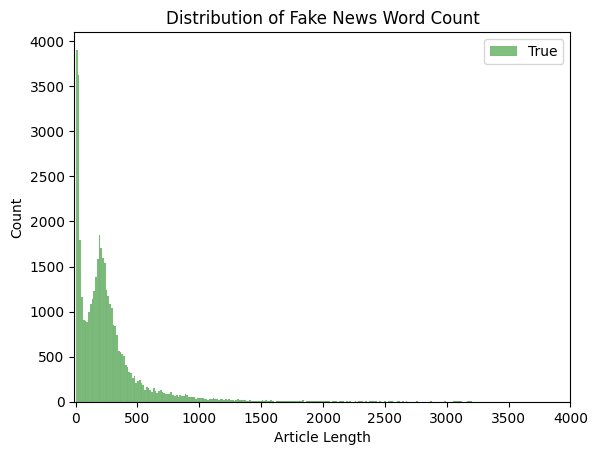

In [ ]:
sns.histplot(fake_word_count, color='green', label='True', alpha=0.5)
#sns.histplot(data=fake_df['text'].apply(get_length), color='red', label='Fake', alpha=0.5)
plt.xlabel('Article Length')
plt.xlim([-10,4000])
plt.ylabel('Count')
plt.title('Distribution of Fake News Word Count')
plt.legend()
plt.show()

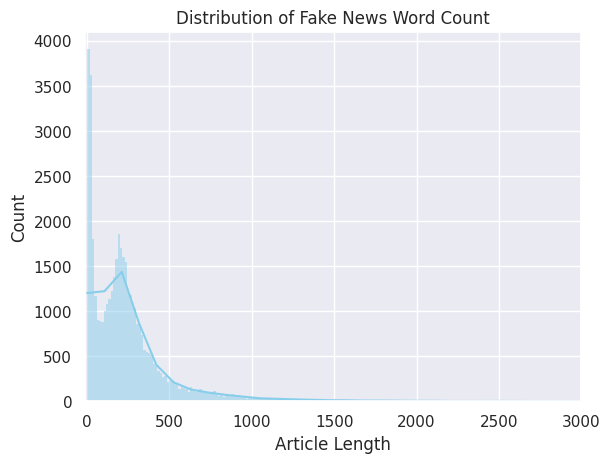

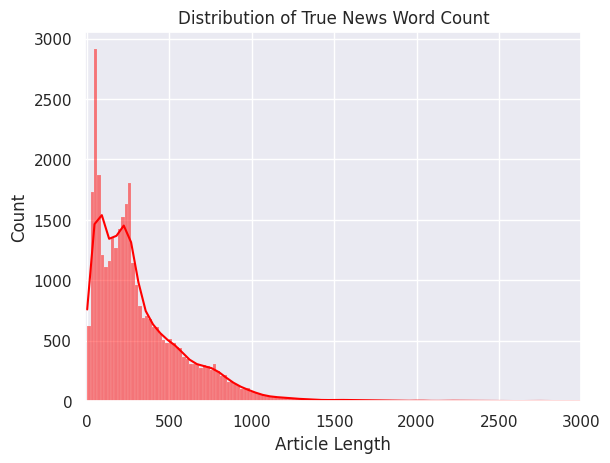

In [ ]:
sns.set(style="darkgrid")

sns.histplot(data=fake_word_count , color="skyblue", label="fake word count", kde=True)
plt.xlabel('Article Length')
plt.xlim([-10,3000])
plt.ylabel('Count')
plt.title('Distribution of Fake News Word Count')
plt.show()


sns.histplot(data=true_word_count, color="red", label="true word count", kde=True)
plt.xlabel('Article Length')
plt.xlim([-10,3000])
plt.ylabel('Count')
plt.title('Distribution of True News Word Count')
plt.show()



In [ ]:
import nltk
nltk.download('punkt')

def avg_words_per_sentence(df):
    avg_words = []
    for text in df['text']:
        # Tokenize the text into sentences
        sentences = nltk.sent_tokenize(text)
        # Count the total number of words in all sentences and divide by the number of sentences
        avg_words_per_sent = sum([len(nltk.word_tokenize(sent)) for sent in sentences]) / len(sentences)
        avg_words.append(avg_words_per_sent)
    return avg_words

def len_words1(df):
  len_words = []
  for text in df['text']:
      # Tokenize the text into sentences
      sentences = nltk.sent_tokenize(text)
      len_words.append([len(nltk.word_tokenize(sent)) for sent in sentences])
  return len_words

# Calculate average number of words per sentence for true and fake dataframes
true_avg_words = len_words1(true_df.astype(str))
fake_avg_words = len_words1(fake_df.astype(str))

# Print the results
#print('True news average words per sentence:', round(sum(true_avg_words) / len(true_avg_words),1))
#print('Fake news average words per sentence:', round(sum(fake_avg_words) / len(fake_avg_words),1))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def len_words(df):
  len_words = []
  for text in df['text_processed3']:
      # Tokenize the text into sentences
      sentences = nltk.sent_tokenize(text)
      len_words.append([len(nltk.word_tokenize(sent)) for sent in sentences])
  return len_words

# Calculate average number of words per sentence for true and fake dataframes
true_avg_words3 = len_words(true_df.astype(str))
fake_avg_words3 = len_words(fake_df.astype(str))


In [ ]:

def preprocess_text2(text):
    # convert text to lowercase
    text = text.lower()
    # remove punctuation and numbers
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)

    stop_words1 = ['the', 'or', 'you','we','they','a', 'an', 'and', 'is', 'are', 'to','his', 'her', 'he','she', 
                 'for', 'in', 'that', 'this', 'with', 'on', 'at', 'by', 'from', 
                 'as', 'be', 'was', 'were', 'has', 'have', 'had','it', 'i', "'s", 's', 't','its','mr','who']
    text = ' '.join(word for word in text.split() if word not in stop_words1)
    # split text into words
  
    return text

# Apply preprocessing to text data
true_df['text_processed2'] = true_df['text'].astype(str).apply(preprocess_text2)
fake_df['text_processed2'] = fake_df['text'].astype(str).apply(preprocess_text2)

# Combine all text into a single string for each dataframe
true_text = ' '.join(true_df['text_processed2'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x))
fake_text = ' '.join(fake_df['text_processed2'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x))

# Tokenize the text and count the word frequency
true_tokens = true_text.split()
fake_tokens = fake_text.split()

# Remove 'of' from the word frequency count
true_tokens = [token for token in true_tokens if token != 'of']
fake_tokens = [token for token in fake_tokens if token != 'of']

true_word_freq = Counter(true_tokens)
fake_word_freq = Counter(fake_tokens)

# Create dataframe for word frequencies
true_word_df = pd.DataFrame.from_dict(true_word_freq, orient='index', columns=['frequency'])
fake_word_df = pd.DataFrame.from_dict(fake_word_freq, orient='index', columns=['frequency'])

# Get the top 20 most frequent words for each dataframe
true_top_words = true_word_df.nlargest(20, columns='frequency')
fake_top_words = fake_word_df.nlargest(20, columns='frequency')



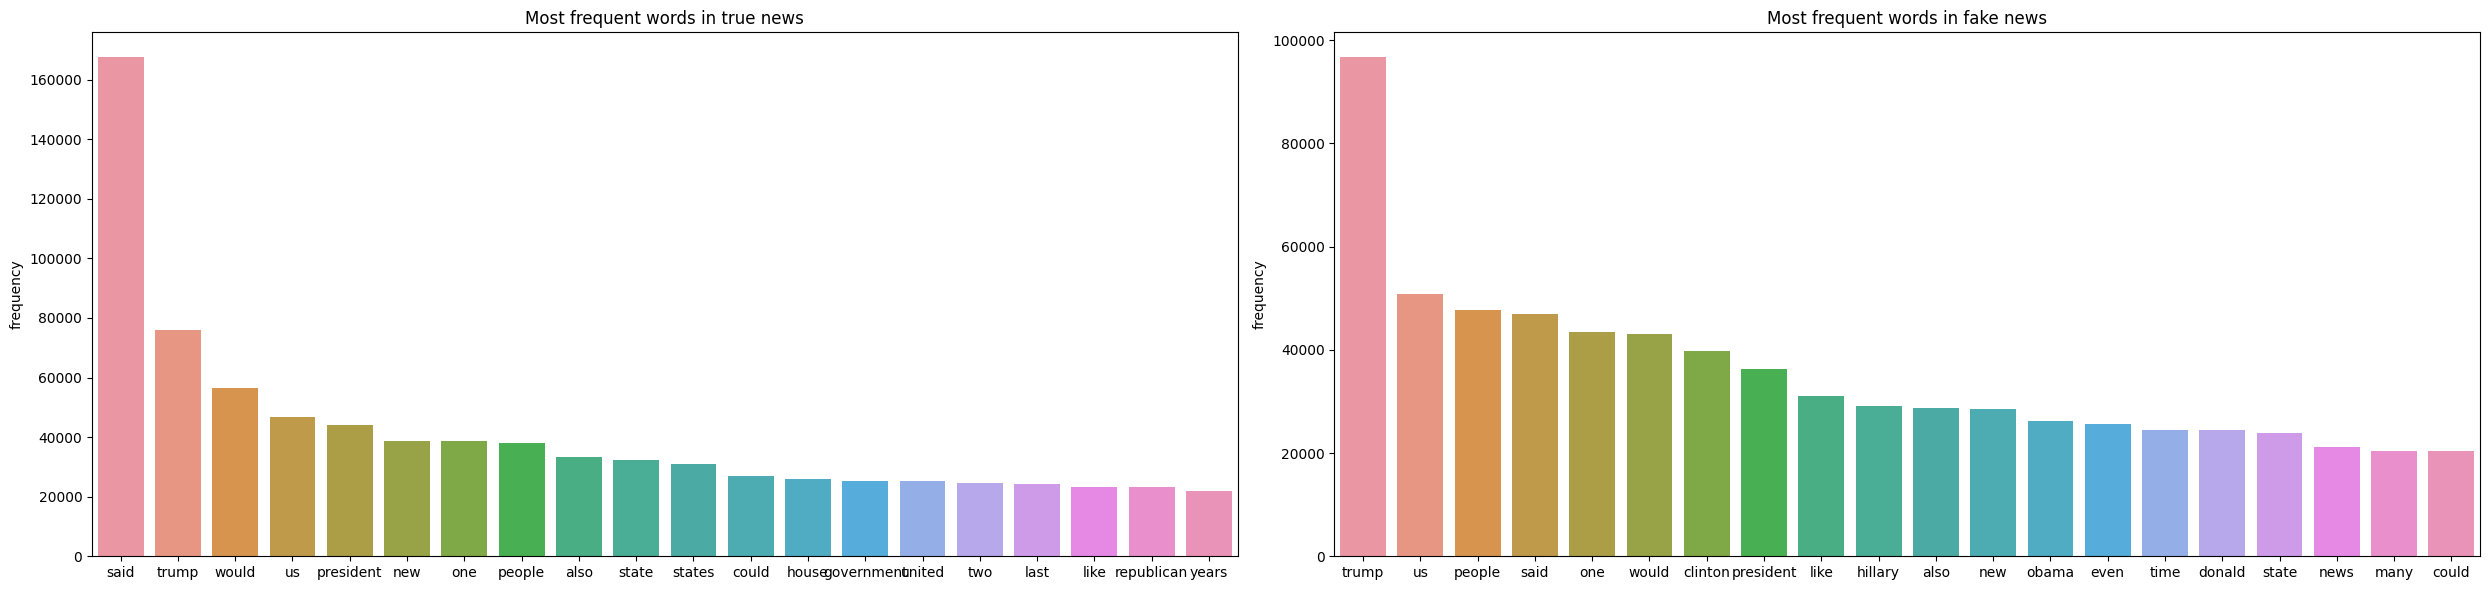

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(25, 6))
sns.barplot(x=true_top_words.index, y=true_top_words['frequency'], ax=axes[0])
sns.barplot(x=fake_top_words.index, y=fake_top_words['frequency'], ax=axes[1])
axes[0].set_title('Most frequent words in true news')
axes[1].set_title('Most frequent words in fake news')
plt.tight_layout()
plt.show()

# ML

In [ ]:
# preprocessing the data

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = str(text).split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

true_df['text_processed3'] = true_df['text'].apply(preprocess_text)
fake_df['text_processed3'] = fake_df['text'].apply(preprocess_text)


In [ ]:
extra['text_processed3'] = fake_df['text'].apply(preprocess_text)

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Add labels to the dataframes
true_df['label'] = 1
fake_df['label'] = 0

# Combine the dataframes
df = pd.concat([true_df, fake_df], ignore_index=True)
df = df.dropna()
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text_processed3'], df['label'], test_size=0.2, random_state=42)

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)

# Fit the vectorizer to the training data and transform the training and testing data
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Logistic Regression model on the training data

model = PassiveAggressiveClassifier(max_iter=100)
model.fit(X_train_vectorized, y_train)

# Predict labels for the testing data
y_pred = model.predict(X_test_vectorized)

# Calculate accuracy score and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Confusion matrix:\n {conf_matrix}")

Accuracy: 0.9504389871484922
Confusion matrix:
 [[8385  322]
 [ 457 6554]]


In [ ]:
# save the model to reuse it in webpage database

with open('PassAgg_model.pkl', 'wb') as f:
    pickle.dump({'model': model, 'vectorizer': vectorizer}, f)
